In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("EDA/data/with_avg_vals.csv")
df.head()

,1_1,1_2,1_3,1_4,1_5,1_6,2_1,2_2,2_3,2_4,...,62_5,62_6,63_1,63_2,63_3,63_4,63_5,63_6,name,task
0,2.148821e-12,1.762882e-12,1.459278e-13,1.587917e-13,8.052632e-14,9.811591e-14,4.880873e-12,3.717614e-12,5.085536e-14,1.059260e-13,...,1.276443e-12,8.376371e-13,2.611143e-12,4.619382e-12,9.115283e-13,4.653725e-13,6.211839e-13,8.285990e-13,chcon_s_100,0
1,1.270260e-12,8.164477e-13,5.903729e-13,3.056763e-13,1.406329e-13,1.300234e-13,1.355080e-12,1.772045e-12,3.034272e-13,5.719425e-13,...,8.724144e-13,1.631172e-12,3.973207e-12,3.763169e-12,1.845015e-12,1.511330e-12,1.079865e-12,2.844522e-12,chcon_s_100,0
2,7.709517e-13,1.717117e-13,3.039963e-13,1.663584e-13,1.726942e-13,1.575523e-14,8.081481e-13,3.148841e-13,2.274227e-13,2.398548e-13,...,4.848598e-13,2.998910e-12,7.980503e-13,1.972731e-12,1.151927e-12,1.502789e-12,1.407080e-12,4.519942e-12,chcon_s_100,0
3,2.800220e-12,3.611335e-13,9.828645e-13,3.723583e-13,1.130286e-13,1.024523e-13,6.833368e-12,1.860960e-13,9.452324e-13,1.900433e-13,...,1.179424e-12,1.033002e-12,2.197372e-12,7.087539e-13,8.981474e-13,9.161498e-13,6.247119e-13,1.532856e-12,chcon_s_100,0
4,9.507999e-13,4.833313e-13,1.694255e-12,1.434799e-13,1.543624e-13,1.756470e-14,2.416072e-12,9.628125e-13,2.960569e-12,1.021592e-13,...,4.516402e-13,2.892556e-13,4.063033e-12,1.206668e-12,1.582814e-12,6.090663e-13,1.444978e-12,2.585149e-12,chcon_s_100,0


In [5]:
X = df.iloc[:, :-2].values
y = df.task

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
def sigmoid(y_pred):
    return 1.0 / (1.0 + np.exp(-y_pred))

In [5]:
def log_loss_results(clf, X, y_true):
    return [log_loss(y_true=y_true, y_pred=sigmoid(y_pred)) for y_pred in clf.staged_decision_function(X)]

In [6]:
def plot_loss(test_size, learning_rate, train_loss, test_loss):
    plt.figure(figsize=(14, 7))
    plt.plot(train_loss, "g", linewidth=2.5)
    plt.plot(test_loss, "b", linewidth=2.5)
    plt.legend(["train", "test"])
    plt.savefig(fname='graphics/test_size_' + test_size + '_learning_rate_' + str(learning_rate).replace('.', '_') + '.jpg')
    plt.show()

Learning rate: 1
      Iter       Train Loss   Remaining Time 
         1           1.3485            7.20m
         2           1.3266            7.72m
         3           1.3047            7.53m
         4           1.2866            7.42m
         5           1.2685            7.40m
         6           1.2451            7.31m
         7           1.2266            7.23m
         8           1.2089            7.18m
         9           1.1879            7.13m
        10           1.1659            7.08m
        20           0.9742            6.61m
        30           0.8176            6.19m
        40           0.6852            5.80m
        50           0.5738            5.43m
        60           0.4818            5.09m
        70           0.4012            4.71m
        80           0.3331            4.34m
        90           0.2827            3.98m
       100           0.2410            3.61m
       200           0.0608            0.00s


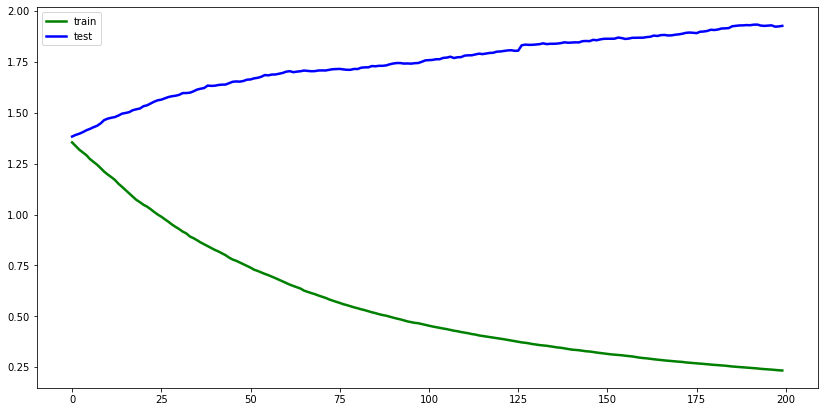

Min loss 1.383 at n_estimators=1

Learning rate: 0.5
      Iter       Train Loss   Remaining Time 
         1           1.3579            7.19m
         2           1.3416            7.17m
         3           1.3299            7.17m
         4           1.3119            7.13m
         5           1.2947            7.13m
         6           1.2784            7.05m
         7           1.2645            7.00m
         8           1.2539            6.97m
         9           1.2451            6.94m
        10           1.2288            6.89m
        20           1.1173            6.48m
        30           1.0051            6.08m
        40           0.9129            5.71m
        50           0.8296            5.35m
        60           0.7600            4.99m
        70           0.6910            4.62m
        80           0.6321            4.27m
        90           0.5737            4.13m
       100           0.5244            3.94m
       200           0.2211            0.00s


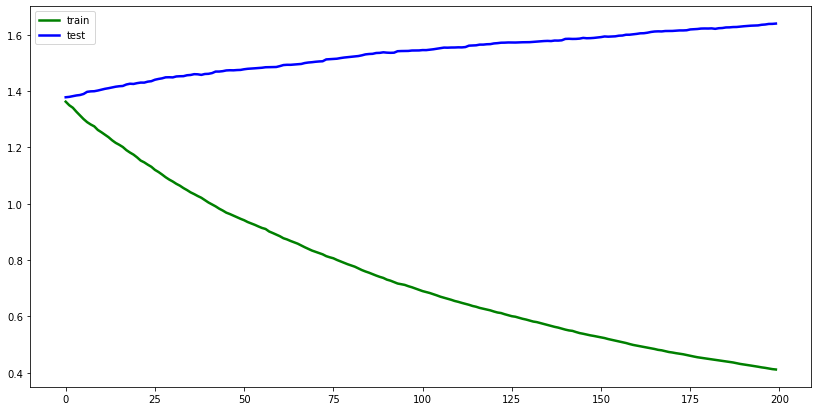

Min loss 1.378 at n_estimators=1

Learning rate: 0.3
      Iter       Train Loss   Remaining Time 
         1           1.3645            7.21m
         2           1.3533            7.06m
         3           1.3438            7.03m
         4           1.3330            7.00m
         5           1.3219            6.97m
         6           1.3131            6.91m
         7           1.3047            6.90m
         8           1.2944            6.87m
         9           1.2863            6.83m
        10           1.2773            6.79m
        20           1.2046            6.64m
        30           1.1340            6.18m
        40           1.0628            5.76m
        50           0.9975            5.37m
        60           0.9440            4.99m
        70           0.8879            4.62m
        80           0.8381            4.25m
        90           0.7913            3.91m
       100           0.7445            3.54m
       200           0.4316            0.00s


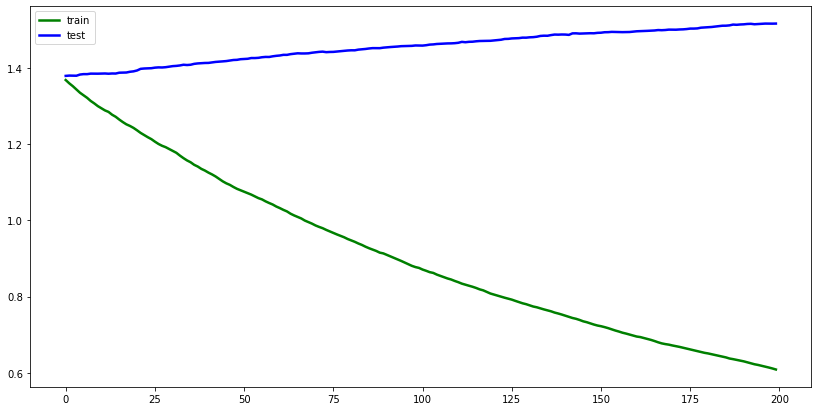

Min loss 1.379 at n_estimators=1

Learning rate: 0.2
      Iter       Train Loss   Remaining Time 
         1           1.3685            7.14m
         2           1.3610            7.16m
         3           1.3541            7.05m
         4           1.3468            7.09m
         5           1.3408            7.03m
         6           1.3332            6.99m
         7           1.3265            6.96m
         8           1.3178            6.89m
         9           1.3123            6.85m
        10           1.3063            6.84m
        20           1.2514            6.44m
        30           1.1959            6.03m
        40           1.1463            5.66m
        50           1.0996            5.35m
        60           1.0552            5.01m
        70           1.0113            4.63m
        80           0.9740            4.26m
        90           0.9339            3.90m
       100           0.8965            3.53m
       200           0.6182            0.00s


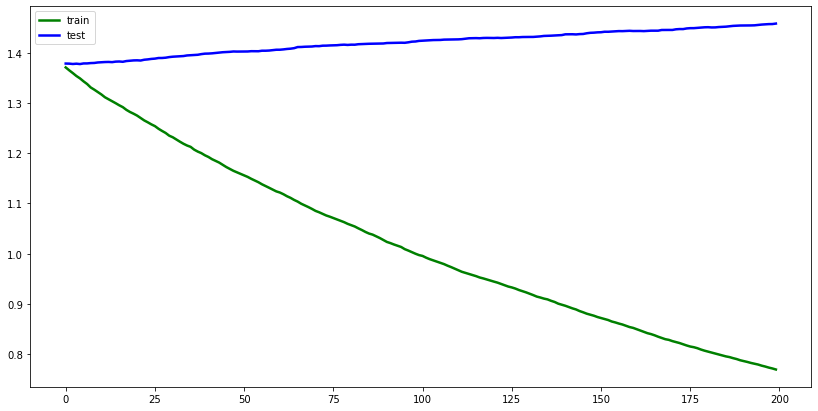

Min loss 1.377 at n_estimators=5

Learning rate: 0.1
      Iter       Train Loss   Remaining Time 
         1           1.3729            7.24m
         2           1.3688            7.12m
         3           1.3643            7.06m
         4           1.3610            7.02m
         5           1.3569            7.00m
         6           1.3537            7.01m
         7           1.3497            6.98m
         8           1.3459            6.94m
         9           1.3424            6.91m
        10           1.3385            6.90m
        20           1.3089            6.72m
        30           1.2776            6.38m
        40           1.2498            5.99m
        50           1.2248            5.59m
        60           1.1993            5.19m
        70           1.1759            4.80m
        80           1.1503            4.42m
        90           1.1275            4.04m
       100           1.1037            3.66m
       200           0.9063            0.00s


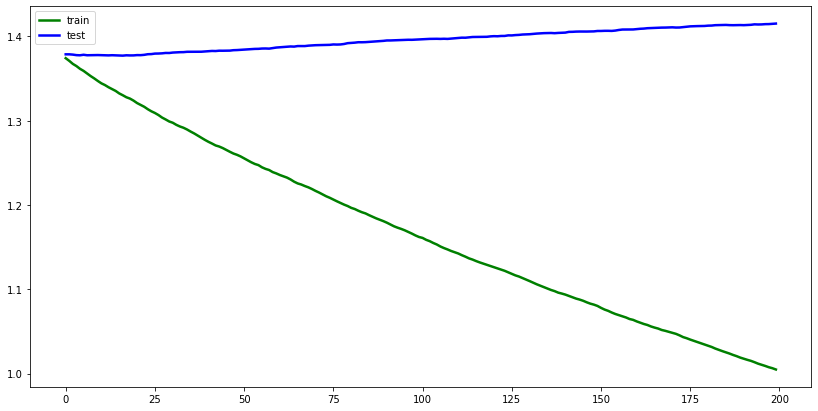

Min loss 1.377 at n_estimators=17

Learning rate: 0.05
      Iter       Train Loss   Remaining Time 
         1           1.3752            7.38m
         2           1.3729            7.23m
         3           1.3709            7.17m
         4           1.3690            7.18m
         5           1.3672            7.16m
         6           1.3652            7.11m
         7           1.3633            7.07m
         8           1.3616            7.02m
         9           1.3600            6.98m
        10           1.3583            6.94m
        20           1.3402            6.63m
        30           1.3247            6.23m
        40           1.3101            5.84m
        50           1.2972            5.48m
        60           1.2835            5.09m
        70           1.2703            4.72m
        80           1.2572            4.36m
        90           1.2451            3.99m
       100           1.2324            3.63m
       200           1.1128            0.00s

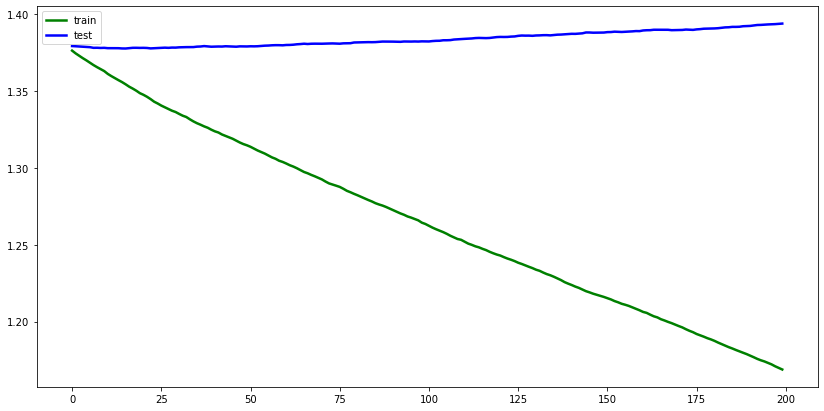

Min loss 1.377 at n_estimators=16



In [7]:
min_loss_results = {}
score_list = []
test_size = 0.4

for rate in [1, 0.5, 0.3, 0.2, 0.1, 0.05]:
    print(f"Learning rate: {rate}")
    clf = GradientBoostingClassifier(n_estimators=200, verbose=1, learning_rate=rate).fit(X_train, y_train)
    
    train_loss = log_loss_results(clf, X_train, y_train)
    test_loss = log_loss_results(clf, X_test, y_test)
    plot_loss(str(test_size).replace('.', '_'), rate, train_loss, test_loss)
    
    min_loss_val = np.min(test_loss)
    min_loss_index = test_loss.index(min_loss_val) + 1
    min_loss_results[rate] = min_loss_val, min_loss_index
    
    score_list.append(clf.score(X_test, y_test))
    
    print(f"Min loss {min_loss_val:.3f} at n_estimators={min_loss_index}\n")
    
with open('output/score.csv', 'a') as f:
    f.write(str(test_size) + ', ' + str(score_list).replace('[', '').replace(']', '') + ' \n')

#### Let's train models for each person

In [1]:
uniq_names = np.unique(df.name.values)

for name in uniq_names:
    X = df.loc[:, df.name == name].drop(['name', 'task'], axis=1)
    y = df.loc

NameError: name 'np' is not defined

##### Проведём отбор признаков

In [2]:
clf = GradientBoostingClassifier(n_estimators=200, verbose=1, learning_rate=0.1).fit(X_train, y_train)

NameError: name 'GradientBoostingClassifier' is not defined